# 20.07.29 21일차 

# Tensorflow를 이용한 AI 기초 2 

## - Multi-input multi-output 1

yA = a * xA + b<br>
yB = c * exp(yA) + d * xB + e<br>
를 만족하는 데이터에서 a,b,c,d,e를 발견합시다. 초기 웨이트에 따라 학습이 잘되지않을 수 있으니, 여러번 실행해 봅시다

In [1]:
from tensorflow.keras import layers, models
import numpy as np
import tensorflow.keras.backend as K
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
a=2
b=1
c=2
d=3
e=1

In [3]:
x_train_A = np.random.rand(1000,1) * 2 - 1
x_train_B = np.random.rand(1000,1) * 2 - 1
y_train_A = a * x_train_A + b
y_train_B = c * np.exp(y_train_A) + d * x_train_B + e

In [4]:
xA = layers.Input((1,), name='xA')
xB = layers.Input((1,), name='xB')

# a * x_train_A + b
yA = layers.Dense(1, name='yA')(xA)
# np.exp(y_train_A)
h1 = layers.Lambda(lambda x: K.exp(x), name='exp')(yA)
# c * np.exp(y_train_A) + d * x_train_B + e
h2 = layers.Concatenate(name='concat')([h1, xB])

yB = layers.Dense(1, name='yB')(h2) # h2가 원소 2개를 가지고있기 때문에, 자동으로 weight 2개 bias 1개

model = models.Model([xA, xB], [yA, yB])
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
xA (InputLayer)                 [(None, 1)]          0                                            
__________________________________________________________________________________________________
yA (Dense)                      (None, 1)            2           xA[0][0]                         
__________________________________________________________________________________________________
exp (Lambda)                    (None, 1)            0           yA[0][0]                         
__________________________________________________________________________________________________
xB (InputLayer)                 [(None, 1)]          0                                            
______________________________________________________________________________________________

In [5]:
model.compile('adam', 'mse')
hist = model.fit(
    [x_train_A, x_train_B], [y_train_A, y_train_B],
    batch_size = 8,
    epochs = 200,
    validation_split = 0.2
                )

Epoch 1/200
100/100 [==============================] - 0s 5ms/step - loss: 236.0231 - yA_loss: 4.6047 - yB_loss: 231.4184 - val_loss: 221.5455 - val_yA_loss: 4.2897 - val_yB_loss: 217.2558
Epoch 2/200
100/100 [==============================] - 0s 2ms/step - loss: 230.9593 - yA_loss: 4.2089 - yB_loss: 226.7504 - val_loss: 216.5617 - val_yA_loss: 3.8989 - val_yB_loss: 212.6628
Epoch 3/200
100/100 [==============================] - 0s 2ms/step - loss: 225.2753 - yA_loss: 3.8082 - yB_loss: 221.4672 - val_loss: 211.2296 - val_yA_loss: 3.5241 - val_yB_loss: 207.7055
Epoch 4/200
100/100 [==============================] - 0s 2ms/step - loss: 218.8117 - yA_loss: 3.4120 - yB_loss: 215.3997 - val_loss: 204.8760 - val_yA_loss: 3.1465 - val_yB_loss: 201.7295
Epoch 5/200
100/100 [==============================] - 0s 1ms/step - loss: 211.2442 - yA_loss: 3.0228 - yB_loss: 208.2214 - val_loss: 197.1610 - val_yA_loss: 2.7693 - val_yB_loss: 194.3917
Epoch 6/200
100/100 [==============================] - 

100/100 [==============================] - 0s 2ms/step - loss: 0.0417 - yA_loss: 0.0026 - yB_loss: 0.0391 - val_loss: 0.0392 - val_yA_loss: 0.0025 - val_yB_loss: 0.0367
Epoch 91/200
100/100 [==============================] - 0s 1ms/step - loss: 0.0386 - yA_loss: 0.0025 - yB_loss: 0.0361 - val_loss: 0.0359 - val_yA_loss: 0.0024 - val_yB_loss: 0.0335
Epoch 92/200
100/100 [==============================] - 0s 1ms/step - loss: 0.0357 - yA_loss: 0.0023 - yB_loss: 0.0333 - val_loss: 0.0320 - val_yA_loss: 0.0022 - val_yB_loss: 0.0299
Epoch 93/200
100/100 [==============================] - 0s 1ms/step - loss: 0.0317 - yA_loss: 0.0022 - yB_loss: 0.0295 - val_loss: 0.0291 - val_yA_loss: 0.0020 - val_yB_loss: 0.0271
Epoch 94/200
100/100 [==============================] - 0s 2ms/step - loss: 0.0286 - yA_loss: 0.0020 - yB_loss: 0.0266 - val_loss: 0.0264 - val_yA_loss: 0.0019 - val_yB_loss: 0.0245
Epoch 95/200
100/100 [==============================] - 0s 1ms/step - loss: 0.0257 - yA_loss: 0.0020 - 

Epoch 173/200
100/100 [==============================] - 0s 2ms/step - loss: 3.3764e-06 - yA_loss: 4.8701e-09 - yB_loss: 3.3715e-06 - val_loss: 6.5593e-07 - val_yA_loss: 1.1842e-09 - val_yB_loss: 6.5475e-07
Epoch 174/200
100/100 [==============================] - 0s 2ms/step - loss: 4.4426e-07 - yA_loss: 6.8297e-10 - yB_loss: 4.4358e-07 - val_loss: 1.6694e-07 - val_yA_loss: 4.5680e-10 - val_yB_loss: 1.6649e-07
Epoch 175/200
100/100 [==============================] - 0s 1ms/step - loss: 5.6249e-05 - yA_loss: 9.2129e-08 - yB_loss: 5.6157e-05 - val_loss: 1.3345e-06 - val_yA_loss: 1.0273e-09 - val_yB_loss: 1.3335e-06
Epoch 176/200
100/100 [==============================] - 0s 2ms/step - loss: 1.0672e-04 - yA_loss: 1.8369e-07 - yB_loss: 1.0654e-04 - val_loss: 1.4697e-05 - val_yA_loss: 2.0081e-07 - val_yB_loss: 1.4496e-05
Epoch 177/200
100/100 [==============================] - 0s 1ms/step - loss: 7.1744e-04 - yA_loss: 1.1009e-06 - yB_loss: 7.1634e-04 - val_loss: 3.9584e-05 - val_yA_loss: 2.

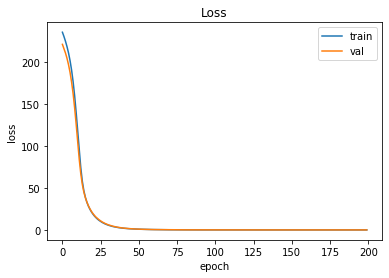

In [11]:
plt.title('Loss')
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc=1)
plt.show()

In [8]:
yA_weights = model.get_layer('yA').get_weights()
yB_weights = model.get_layer('yB').get_weights()
print('yA_weights\n', yA_weights)
print('yB_weights\n', yB_weights)

yA_weights
 [array([[2.0000155]], dtype=float32), array([1.0000031], dtype=float32)]
yB_weights
 [array([[1.9999948],
       [2.9999788]], dtype=float32), array([0.99995774], dtype=float32)]


---

## - shared layer 0 

여러 텐서들의 흐름에 대해 웨이트를 공유하는 레이어에 대해 공부해봅시다. 그 예로서<br>
hA = a * xA + b<br>
hB = a * xB + b<br>
y = hA * hB<br>
관계를 만족시키는 데이터에서 a, b를 발견해 봅시다. 초기 웨이트에 따라서 학습이 잘안될수도 있음으로, 여러번 실행해봅시다.

In [43]:
a = 2
b = 1

x_train_A = np.random.rand(1000, 1) * 2 - 1
x_train_B = np.random.rand(1000, 1) * 2 - 1
y_train = (a * x_train_A + b) * (a * x_train_B + b)

In [44]:
xA = layers.Input((1,), name='xA')
xB = layers.Input((1,), name='xB')

shared_layer = layers.Dense(1, name='shared_layer')

sA = shared_layer(xA)
sB = shared_layer(xB)

y = layers.Multiply(name='y')([sA, sB])

In [45]:
model = models.Model([xA, xB], y)
model.summary()

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
xA (InputLayer)                 [(None, 1)]          0                                            
__________________________________________________________________________________________________
xB (InputLayer)                 [(None, 1)]          0                                            
__________________________________________________________________________________________________
shared_layer (Dense)            (None, 1)            2           xA[0][0]                         
                                                                 xB[0][0]                         
__________________________________________________________________________________________________
y (Multiply)                    (None, 1)            0           shared_layer[0][0]         

In [46]:
model.compile('adam', 'mse')
hist = model.fit(
    [x_train_A, x_train_B],
    y_train,
    batch_size = 8,
    epochs = 200,
    validation_split = 0.2
)

Epoch 1/200
100/100 [==============================] - 0s 2ms/step - loss: 5.5078 - val_loss: 6.2076
Epoch 2/200
100/100 [==============================] - 0s 1ms/step - loss: 5.3523 - val_loss: 5.9319
Epoch 3/200
100/100 [==============================] - 0s 1ms/step - loss: 5.0252 - val_loss: 5.4815
Epoch 4/200
100/100 [==============================] - 0s 2ms/step - loss: 4.5495 - val_loss: 4.8487
Epoch 5/200
100/100 [==============================] - 0s 1ms/step - loss: 3.9731 - val_loss: 4.1899
Epoch 6/200
100/100 [==============================] - 0s 2ms/step - loss: 3.3678 - val_loss: 3.4966
Epoch 7/200
100/100 [==============================] - 0s 1ms/step - loss: 2.7742 - val_loss: 2.8466
Epoch 8/200
100/100 [==============================] - 0s 1ms/step - loss: 2.2307 - val_loss: 2.2612
Epoch 9/200
100/100 [==============================] - 0s 1ms/step - loss: 1.7652 - val_loss: 1.7845
Epoch 10/200
100/100 [==============================] - 0s 1ms/step - loss: 1.3915 - val_lo

100/100 [==============================] - 0s 1ms/step - loss: 7.3048e-14 - val_loss: 1.2502e-13
Epoch 152/200
100/100 [==============================] - 0s 1ms/step - loss: 4.7662e-14 - val_loss: 2.7892e-14
Epoch 153/200
100/100 [==============================] - 0s 2ms/step - loss: 4.4481e-14 - val_loss: 2.7892e-14
Epoch 154/200
100/100 [==============================] - 0s 1ms/step - loss: 1.1889e-13 - val_loss: 1.2502e-13
Epoch 155/200
100/100 [==============================] - 0s 1ms/step - loss: 5.5753e-14 - val_loss: 2.7892e-14
Epoch 156/200
100/100 [==============================] - 0s 2ms/step - loss: 2.0380e-13 - val_loss: 4.4985e-13
Epoch 157/200
100/100 [==============================] - 0s 1ms/step - loss: 1.9614e-12 - val_loss: 4.2085e-13
Epoch 158/200
100/100 [==============================] - 0s 1ms/step - loss: 5.0149e-13 - val_loss: 8.8314e-13
Epoch 159/200
100/100 [==============================] - 0s 1ms/step - loss: 2.6219e-13 - val_loss: 1.6899e-12
Epoch 160/200
1

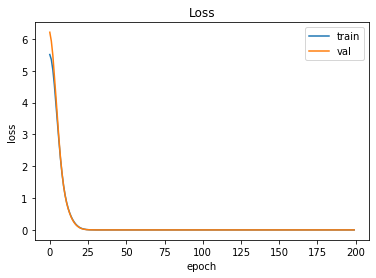

In [47]:
plt.title('Loss')
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc=1)
plt.show()

In [48]:
s_weights = model.get_layer('shared_layer').get_weights()
print('s_weights\n', s_weights)

s_weights
 [array([[1.9999998]], dtype=float32), array([0.9999995], dtype=float32)]


---

## - shared layer 1

공유 레이어를 사용하여<br>
hA = sigmoid(a * xA + b)<br>
hB = sigmoid(a * xB + b)<br>
y = c * hA * hB + d<br>
관계를 만족시키는 데이터에서 a,b,c,d를 발견해 봅시다.

In [13]:
a = 1
b = 3
c = 2
d = 3

def sigmoid(x):
    return 1/(1+np.exp(-x))

x_train_A = np.random.rand(1000, 1) * 2 -1
x_train_B = np.random.rand(1000, 1) * 2 -1
y_train = c * sigmoid(a*x_train_A+b) * sigmoid(a*x_train_B+b) + d

In [14]:
xA = layers.Input((1,), name='xA')
xB = layers.Input((1,), name='xB')

shared_layer = layers.Dense(1, activation='sigmoid', name='shared_layer')
hA = shared_layer(xA)
hB = shared_layer(xB)

mul = layers.Multiply(name='mul')([hA, hB])
y = layers.Dense(1, name='y')(mul)

model = models.Model([xA, xB], y)
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
xA (InputLayer)                 [(None, 1)]          0                                            
__________________________________________________________________________________________________
xB (InputLayer)                 [(None, 1)]          0                                            
__________________________________________________________________________________________________
shared_layer (Dense)            (None, 1)            2           xA[0][0]                         
                                                                 xB[0][0]                         
__________________________________________________________________________________________________
mul (Multiply)                  (None, 1)            0           shared_layer[0][0]         

In [15]:
model.compile('adam', 'mse')
hist = model.fit(
        [x_train_A, x_train_B],
        y_train,
        batch_size=10,
        epochs=200,
        validation_split=0.2
    )

Epoch 1/200
80/80 [==============================] - 0s 2ms/step - loss: 25.9892 - val_loss: 25.3499
Epoch 2/200
80/80 [==============================] - 0s 1ms/step - loss: 24.7693 - val_loss: 24.1760
Epoch 3/200
80/80 [==============================] - 0s 1ms/step - loss: 23.6371 - val_loss: 23.0866
Epoch 4/200
80/80 [==============================] - 0s 1ms/step - loss: 22.5835 - val_loss: 22.0687
Epoch 5/200
80/80 [==============================] - 0s 1ms/step - loss: 21.5986 - val_loss: 21.1175
Epoch 6/200
80/80 [==============================] - 0s 1ms/step - loss: 20.6743 - val_loss: 20.2221
Epoch 7/200
80/80 [==============================] - ETA: 0s - loss: 19.88 - 0s 1ms/step - loss: 19.8036 - val_loss: 19.3771
Epoch 8/200
80/80 [==============================] - 0s 1ms/step - loss: 18.9805 - val_loss: 18.5776
Epoch 9/200
80/80 [==============================] - 0s 1ms/step - loss: 18.2003 - val_loss: 17.8171
Epoch 10/200
80/80 [==============================] - 0s 1ms/step -

80/80 [==============================] - 0s 1ms/step - loss: 2.5009e-04 - val_loss: 2.3820e-04
Epoch 82/200
80/80 [==============================] - 0s 1ms/step - loss: 2.3700e-04 - val_loss: 2.2854e-04
Epoch 83/200
80/80 [==============================] - 0s 1ms/step - loss: 2.2794e-04 - val_loss: 2.2268e-04
Epoch 84/200
80/80 [==============================] - 0s 1ms/step - loss: 2.2224e-04 - val_loss: 2.1897e-04
Epoch 85/200
80/80 [==============================] - 0s 1ms/step - loss: 2.1865e-04 - val_loss: 2.1673e-04
Epoch 86/200
80/80 [==============================] - 0s 1ms/step - loss: 2.1652e-04 - val_loss: 2.1548e-04
Epoch 87/200
80/80 [==============================] - 0s 1ms/step - loss: 2.1517e-04 - val_loss: 2.1474e-04
Epoch 88/200
80/80 [==============================] - 0s 1ms/step - loss: 2.1441e-04 - val_loss: 2.1435e-04
Epoch 89/200
80/80 [==============================] - 0s 1ms/step - loss: 2.1400e-04 - val_loss: 2.1416e-04
Epoch 90/200
80/80 [=====================

80/80 [==============================] - 0s 1ms/step - loss: 2.1399e-04 - val_loss: 2.1378e-04
Epoch 157/200
80/80 [==============================] - 0s 1ms/step - loss: 2.1384e-04 - val_loss: 2.1388e-04
Epoch 158/200
80/80 [==============================] - 0s 1ms/step - loss: 2.1525e-04 - val_loss: 2.1340e-04
Epoch 159/200
80/80 [==============================] - 0s 1ms/step - loss: 2.1428e-04 - val_loss: 2.1287e-04
Epoch 160/200
80/80 [==============================] - 0s 1ms/step - loss: 2.1435e-04 - val_loss: 2.1263e-04
Epoch 161/200
80/80 [==============================] - 0s 1ms/step - loss: 2.1355e-04 - val_loss: 2.1305e-04
Epoch 162/200
80/80 [==============================] - 0s 1ms/step - loss: 2.1422e-04 - val_loss: 2.1452e-04
Epoch 163/200
80/80 [==============================] - 0s 1ms/step - loss: 2.1344e-04 - val_loss: 2.1290e-04
Epoch 164/200
80/80 [==============================] - 0s 1ms/step - loss: 2.1744e-04 - val_loss: 2.1423e-04
Epoch 165/200
80/80 [============

<function matplotlib.pyplot.show(*args, **kw)>

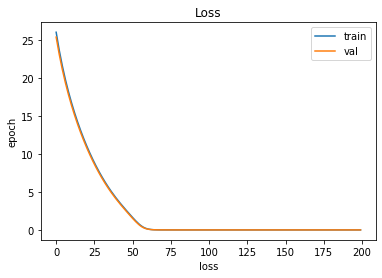

In [16]:
plt.title('Loss')
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.xlabel('loss')
plt.ylabel('epoch')
plt.legend(['train', 'val'], loc=1)
plt.show

In [17]:
x_weights = model.get_layer('shared_layer').get_weights()
y_weights = model.get_layer('y').get_weights()

print('x_weights\n', x_weights)
print('y_weights\n', y_weights)

x_weights
 [array([[0.3147999]], dtype=float32), array([1.0322136], dtype=float32)]
y_weights
 [array([[2.0729597]], dtype=float32), array([3.6673443], dtype=float32)]


---

## - GAN 0 MNIST 

랜덤 노이즈를 입력으로 받아 학습한 것과 비슷하지만 새로운 필기체 숫자 이미를 출력하는 Generative Adversarial Network(GAN)을 만들어 봅시다. 먼저 학습 이미지를 로드합니다. 레이블과 테스트 데이터는 필요하지 않습니다.

- 생성자와 판별자
    - 생성자는 판별자를 속이기 위해 가짜이미지 생성 학습
    - 판별자는 가짜이미지를 판별하기 위해 학습

In [50]:
from tensorflow.keras import datasets, layers, models, utils, optimizers

In [55]:
(train_images, _), (_,_) = datasets.mnist.load_data()
print('train_images', type(train_images), train_images.shape, train_images.dtype)

train_images <class 'numpy.ndarray'> (60000, 28, 28) uint8


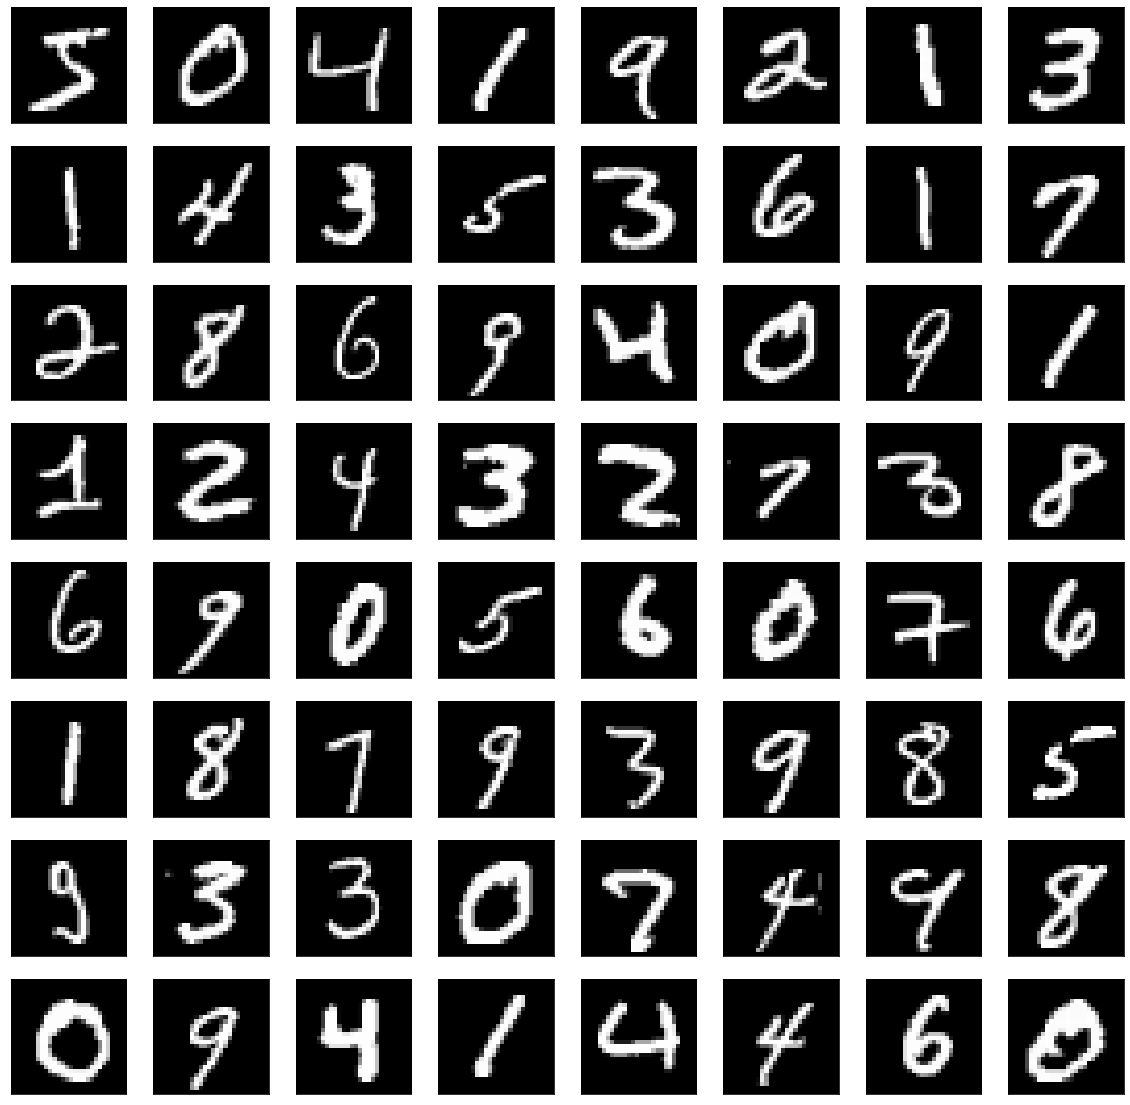

In [56]:
plt.figure(figsize=(20,20))
for i in range(0, 8*8):
    plt.subplot(8,8,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i], cmap='gray')

In [57]:
# 이미지의 가로 세로 정보를 기록
_, H, W = train_images.shape

In [63]:
# 이미지 정규화
# CNN이 깊이의 차원이 있어야하기 때문에, 1을 넣어준다.(흑백:1, 컬러:3)
# -1~1로 정규화하기 위해 /127.5로 0~2를 만들고 -1 로 -1~1
train_x = (train_images.reshape(-1, H, W, 1) / 127.5 -1).astype('float32')
print('train_x', type(train_x), train_x.shape, train_x.dtype)

train_x <class 'numpy.ndarray'> (60000, 28, 28, 1) float32


### - 생성망 = 노이즈를 입력받아 이미지를 생성

In [2]:
input_dim = 10
def gen_noise(batch_size):
    return np.random.uniform(-1, 1, (batch_size, input_dim))

In [3]:
G = models.Sequential()

G.add( layers.Dense(7*7*128, input_dim=input_dim) )
G.add( layers.LeakyReLU(0.2) )
G.add( layers.Reshape((7,7,128)) )
G.add( layers.UpSampling2D(size=(2,2)) ) # 14*14
G.add( layers.Conv2D(64, kernel_size=(5,5), padding='same') )
G.add( layers.LeakyReLU(0.2) )
G.add( layers.UpSampling2D(size=(2,2)) ) # 28*28
G.add( layers.Conv2D(1, kernel_size=(5,5), padding='same', activation='tanh') ) # 깊이가 1인 커널이 나와야한다.

G.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6272)              68992     
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 6272)              0         
_________________________________________________________________
reshape (Reshape)            (None, 7, 7, 128)         0         
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 14, 14, 64)        204864    
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 28, 28, 64)        0

#### 학습 전 노이즈 입력

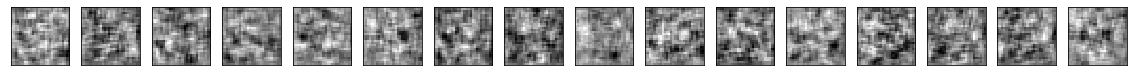

In [69]:
generated = G.predict( gen_noise(16) ) # 16*10

plt.figure( figsize=(20,2) )
for i in range(16):
    plt.subplot(1, 16, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(generated[i].reshape((H,W)), cmap='gray')